# Feature Detection and Matching

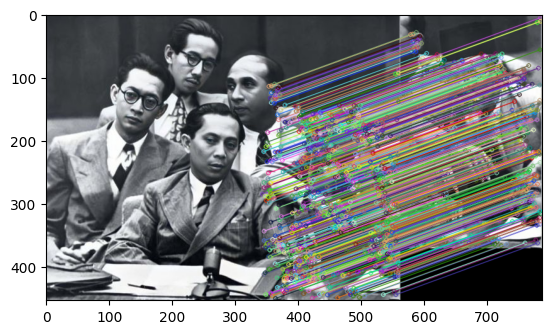

(<matplotlib.image.AxesImage at 0x19da459b450>, None)

In [3]:
# Contoh Script untuk feature detection and Matching
# Modifikasi script ini untuk mencoba metode yang berbeda

import numpy as np
import cv2
from matplotlib import pyplot as plt

# Gunakan gambar yang ada pada laptop masing-masing
img1 = cv2.imread('p.jpg') # gambar yang dituju
img2 = cv2.imread('wow.jpg') # gambar yang dicari
gray1= cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2= cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

# Menggunakan Detector SIFT
sift = cv2.SIFT_create()

# Mencari Keypoint dengan SIFT
kp1, des1 = sift.detectAndCompute(gray1,None)
kp2, des2 = sift.detectAndCompute(gray2,None)

# Melakukan Matching dari hasil deteksi keypoints menggunakan
# BruteForce Matcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Uji rasio matching sederhana
good = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append([m])
img3 = None
# menggambar hasil match pada gambar baru (IMG3)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,img3,flags=2)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)),plt.show()